# Fonte dos Dados

### Dados da Covid por Estado
<https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us>

### Dados de Pobreza por Estado
<https://data.ers.usda.gov/reports.aspx?ID=17826>

### Dados de Desemprego e Renda Média Familiar por Estado
<https://data.ers.usda.gov/reports.aspx?ID=17828>

### Dados Gerais sobre Saúde
<https://www.countyhealthrankings.org/>

### Dados Gerais sobre Vacinação
<https://github.com/BloombergGraphics/covid-vaccine-tracker-data/blob/master/data/historical-usa-doses-administered.csv>


In [2]:
import pandas as pd
from datetime import *
import datetime
import numpy as np

def getUrl(data):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/%s.csv' % data
    return url

def getDate(strData):
   ano = int(strData[6:10])
   mes = int(strData[0:2])
   dia = int(strData[3:5])

   date = datetime.date(ano, mes, dia)
   return date

def getStrDate(date):
    mes = str(date)[5:7]
    dia = str(date)[8:10]
    ano = str(date)[0:4]
    strDate = mes+'-'+dia+'-'+ano
    return strDate

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days) + 1):
        yield start_date + timedelta(n)


## Dados Socio-Econômicos

In [3]:
desemprego_df = pd.read_excel('dados_emprego_eua.xlsx')
desemprego_df.columns = ["FIPS", "Nome", "D_2012", "D_2013", "D_2014", "D_2015", "D_2016", "D_2017", "D_2018", "D_2019", "Desemprego_2020", "RendaFamMed"]
desemprego_df=desemprego_df.drop(['D_2012', 'D_2013','D_2014', 'D_2015','D_2016', 'D_2017','D_2018', 'D_2019','FIPS'], axis=1)
desemprego_df.head(5)

,Nome,Desemprego_2020,RendaFamMed
0,Alaska,7.8,77203
1,Arizona,7.9,62027
2,Arkansas,6.1,49020
3,California,10.1,80423
4,Colorado,7.3,77104


In [4]:
pobreza_df = pd.read_excel('dados_pobreza.xlsx')
pobreza_df = pobreza_df.drop(['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 5'], axis=1)
pobreza_df.head(5)

,Nome,PopPobreza,CriancaPobreza
0,Alabama,15.6,21.9
1,Alaska,10.2,13.2
2,Arizona,13.5,19.2
3,Arkansas,16.0,21.7
4,California,11.8,15.6


## Dados de Vacinação por Estado

In [5]:
vacinacao_df = pd.read_csv('https://raw.githubusercontent.com/BloombergGraphics/covid-vaccine-tracker-data/master/data/historical-usa-doses-administered.csv')
vacinacao_df = vacinacao_df.rename(columns={'value':'total_vacinados', 'id':'Sigla'})
for index in vacinacao_df.index:
    if index == 0:
        vacinacao_df.loc[index, 'vacinados_dia'] = vacinacao_df.loc[index, 'total_vacinados']
    else:
        vacinacao_df.loc[index, 'vacinados_dia'] = int(vacinacao_df.loc[index, 'total_vacinados'] - vacinacao_df.loc[index-1, 'total_vacinados'])
vacinacao_df.head(5)

,Sigla,date,total_vacinados,vacinados_dia
0,AK,2020-12-21,5674,5674.0
1,AK,2020-12-22,7118,1444.0
2,AK,2020-12-23,8918,1800.0
3,AK,2020-12-24,11002,2084.0
4,AK,2020-12-26,11845,843.0


## Dados de Saúde e População por Estado

In [6]:
saude_df = pd.read_excel('dados_saude_populacao.xlsx')
saude_df.head()

,Nome,Sigla,Adultos Fumantes,Adultos Obesos,Sedentarismo,Sem Plano Saude,Populacao
0,Alaska,AK,19,32,19,14,724357
1,Arizona,AZ,14,28,21,13,7520103
2,Arkansas,AR,24,35,30,10,3033946
3,California,CA,11,24,18,8,39613493
4,Colorado,CO,15,22,15,9,5893634


## Merge dos Dados de Vacinação e de Saúde

In [7]:
vacina_saude_df = pd.merge(vacinacao_df, saude_df)

vacina_saude_df = vacina_saude_df[[ 'Nome', 'Sigla', 'date', 'total_vacinados', 'vacinados_dia',
       'Adultos Fumantes', 'Adultos Obesos', 'Sedentarismo', 'Sem Plano Saude',
       'Populacao']]
vacina_saude_df


,Nome,Sigla,date,total_vacinados,vacinados_dia,Adultos Fumantes,Adultos Obesos,Sedentarismo,Sem Plano Saude,Populacao
0,Alaska,AK,2020-12-21,5674,5674.0,19,32,19,14,724357
1,Alaska,AK,2020-12-22,7118,1444.0,19,32,19,14,724357
2,Alaska,AK,2020-12-23,8918,1800.0,19,32,19,14,724357
3,Alaska,AK,2020-12-24,11002,2084.0,19,32,19,14,724357
4,Alaska,AK,2020-12-26,11845,843.0,19,32,19,14,724357
...,...,...,...,...,...,...,...,...,...,...
14462,Wyoming,WY,2021-10-27,563122,1873.0,19,29,23,12,581075
14463,Wyoming,WY,2021-10-28,565644,2522.0,19,29,23,12,581075
14464,Wyoming,WY,2021-10-29,568759,3115.0,19,29,23,12,581075
14465,Wyoming,WY,2021-10-31,568969,210.0,19,29,23,12,581075


## Junção dos DataFrames

In [8]:
socio_demog_df = pd.merge(pobreza_df, desemprego_df)
merge_final = pd.merge(socio_demog_df, saude_df)
aux_df = merge_final
merge_final = merge_final[['Nome', 'Sigla', 'PopPobreza', 'CriancaPobreza', 'Desemprego_2020',
       'RendaFamMed', 'Adultos Fumantes', 'Adultos Obesos',
       'Sedentarismo', 'Sem Plano Saude', 'Populacao']]
merge_final.head()
    


,Nome,Sigla,PopPobreza,CriancaPobreza,Desemprego_2020,RendaFamMed,Adultos Fumantes,Adultos Obesos,Sedentarismo,Sem Plano Saude,Populacao
0,Alaska,AK,10.2,13.2,7.8,77203,19,32,19,14,724357
1,Arizona,AZ,13.5,19.2,7.9,62027,14,28,21,13,7520103
2,Arkansas,AR,16.0,21.7,6.1,49020,24,35,30,10,3033946
3,California,CA,11.8,15.6,10.1,80423,11,24,18,8,39613493
4,Colorado,CO,9.4,11.2,7.3,77104,15,22,15,9,5893634


### Renomeando as Colunas

In [9]:
merge_final = merge_final.rename(columns={'Confirmed':'Confirmacoes', 'Deaths':'Mortes', 'Incident_Rate':'Incidencia', 'Total_Test_Results':'Total_Resultados_Testes', 'Case_Fatality_Ratio':'Fatalidade_100_Hab', 'Testing_Rate':'Testes_1M_Hab', 'Confirmed_no_dia':'Confirmacoes_no_Dia', 'Deaths_no_dia':'Mortes_no_Dia'})

In [10]:
merge_final.head()

,Nome,Sigla,PopPobreza,CriancaPobreza,Desemprego_2020,RendaFamMed,Adultos Fumantes,Adultos Obesos,Sedentarismo,Sem Plano Saude,Populacao
0,Alaska,AK,10.2,13.2,7.8,77203,19,32,19,14,724357
1,Arizona,AZ,13.5,19.2,7.9,62027,14,28,21,13,7520103
2,Arkansas,AR,16.0,21.7,6.1,49020,24,35,30,10,3033946
3,California,CA,11.8,15.6,10.1,80423,11,24,18,8,39613493
4,Colorado,CO,9.4,11.2,7.3,77104,15,22,15,9,5893634


## Legenda DataFrame
* PopPobreza - % da população do estado em situação de pobreza
* CriancaPobreza - % da população infantil do estado em situação de pobreza
* Desemprego_2020 - % da população do estado desempregada no ano de 2020
* RendaFamMed - Renda Familiar Média no estado
* Last_Update - Data e hora da última atualização dos dados relativos a covid-19 (casos, mortes, etc)
* Confirmacoes - Total de confirmações de casos de covid-19 no estado até a data (Last_Update)
* Mortes - Total de mortes por covid-19 no estado até a data (Last_Update)
* Incidecia - número de casos a cada 1 milhão de habitantes do estado
* Total_Resultados_Testes - Total de testes realizados no estado
* Fatalidade_100_Hab - proporção (%) de mortes em ralação aos casos no estado
* Testes_1M_Hab - número de testes realizados a cada 1 milhão de habitantes do estado
* Confirmacoes_no_Dia - número de cornfirmacoes de covid no dia no estado
* Mortes_no_Dia - número de mortes por covid no dia no estado
* total_vacinados - número total de vacinados até a data (Last_Update) no estado
* vacinados_dia - número de vacinados no dia em questão no estado
* Adultos Fumantes - % de adultos fumantes no estado
* Adultos Obesos - % de adultos obesos no estado
* Sedentarismo - % da população do estado que é sedentária
* Sem Plano Saúde - % da população do estado que não possui plano de saúde
* Populacao - população do estado em 2021


## Criação dos Dados de Casos e Mortes em um Dado Período


In [11]:
strdatainicial = '01-01-2021'
strdatafinal = '06-01-2021'

datasStr = []
datasDate = []
datainicial = getDate(strdatainicial)
datafinal = getDate(strdatafinal)

for data in daterange(datainicial, datafinal):
    datasStr.append(getStrDate(data))

for data in daterange(datainicial, datafinal):
    datasDate.append(data)

url = getUrl(datasStr[len(datasStr)-1])
df = pd.read_csv(url)
df = df.drop(['Country_Region', 'Lat', 'Long_', 'Recovered', 'Active', 'People_Hospitalized', 'FIPS', 'UID', 'ISO3', 'Hospitalization_Rate', 'Last_Update', 'Incident_Rate'], axis=1)
df = df.rename(columns={'Province_State':'Nome'})

## DataFrame de Número de Casos

casos_df = pd.DataFrame()
casos_df['Nome'] = df['Nome']
for data in datasStr:
    casos_df[data] = pd.read_csv(getUrl(data))['Confirmed']

## DataFrame de Número de Mortes

mortes_df = pd.DataFrame()
mortes_df['Nome'] = df['Nome']
for data in datasStr:
    mortes_df[data] = pd.read_csv(getUrl(data))['Deaths']

## DataFrame de Vacinações
# aaaa-mm-dd
vacinacao_df = pd.read_csv('https://raw.githubusercontent.com/BloombergGraphics/covid-vaccine-tracker-data/master/data/historical-usa-doses-administered.csv')
vacinacao_df = vacinacao_df.rename(columns={'value':'total_vacinados'})
for index in vacinacao_df.index:
    if index == 0:
        vacinacao_df.loc[index, 'vacinados_dia'] = vacinacao_df.loc[index, 'total_vacinados']
    else:
        vacinacao_df.loc[index, 'vacinados_dia'] = int(vacinacao_df.loc[index, 'total_vacinados'] - vacinacao_df.loc[index-1, 'total_vacinados'])
vacinacao_df = vacina_saude_df.iloc[:, :5]

In [12]:
vacinacao_df['diff'] = vacinacao_df['Sigla'].shift(1, fill_value=vacinacao_df['Sigla'].head(1)) != vacinacao_df['Sigla'] 
vacinacao_df

,Nome,Sigla,date,total_vacinados,vacinados_dia,diff
0,Alaska,AK,2020-12-21,5674,5674.0,False
1,Alaska,AK,2020-12-22,7118,1444.0,False
2,Alaska,AK,2020-12-23,8918,1800.0,False
3,Alaska,AK,2020-12-24,11002,2084.0,False
4,Alaska,AK,2020-12-26,11845,843.0,False
...,...,...,...,...,...,...
14462,Wyoming,WY,2021-10-27,563122,1873.0,False
14463,Wyoming,WY,2021-10-28,565644,2522.0,False
14464,Wyoming,WY,2021-10-29,568759,3115.0,False
14465,Wyoming,WY,2021-10-31,568969,210.0,False


### Limpando os DataFrames de Casos e Mortes

In [13]:
estados_validos = merge_final['Nome'].tolist()
casos_df = casos_df[casos_df.Nome.isin(estados_validos)]
mortes_df = mortes_df[mortes_df.Nome.isin(estados_validos)]
mortes_df.head(50)

,Nome,01-01-2021,01-02-2021,01-03-2021,01-04-2021,01-05-2021,01-06-2021,01-07-2021,01-08-2021,01-09-2021,...,05-23-2021,05-24-2021,05-25-2021,05-26-2021,05-27-2021,05-28-2021,05-29-2021,05-30-2021,05-31-2021,06-01-2021
1,Alaska,206,215,215,218,218,220,223,223,224,...,369,369,369,369,369,369,369,369,369,369
3,Arizona,9015,9061,9061,9064,9317,9444,9741,9938,10036,...,17555,17555,17569,17576,17594,17609,17628,17628,17628,17628
4,Arkansas,3711,3729,3749,3800,3836,3901,3926,3966,4010,...,5817,5820,5824,5827,5829,5830,5830,5832,5833,5834
5,California,26168,26444,26515,26783,27196,27769,28312,28946,29459,...,61840,61848,61898,61930,62083,62090,62108,62114,62121,62145
6,Colorado,4873,4912,4934,4944,4991,5050,5102,5138,5190,...,6505,6509,6520,6531,6545,6552,6576,6580,6580,6579
8,Delaware,1065,1072,1080,1085,1093,1102,1112,1116,1128,...,1659,1659,1659,1660,1660,1660,1661,1661,1661,1661
10,District of Columbia,788,792,794,797,801,806,808,809,813,...,1127,1130,1130,1131,1132,1132,1132,1132,1132,1134
11,Florida,21673,21890,21987,22090,22188,22317,22481,22666,22804,...,36474,36501,36581,36647,36733,36774,36774,36774,36774,36869
12,Georgia,10958,10960,10964,10971,11072,11165,11230,11314,11457,...,20661,20661,20699,20735,20774,20820,20837,20837,20837,20838
15,Hawaii,289,289,289,289,289,299,299,303,308,...,496,496,496,496,498,498,499,500,500,500


### Teste Correlação

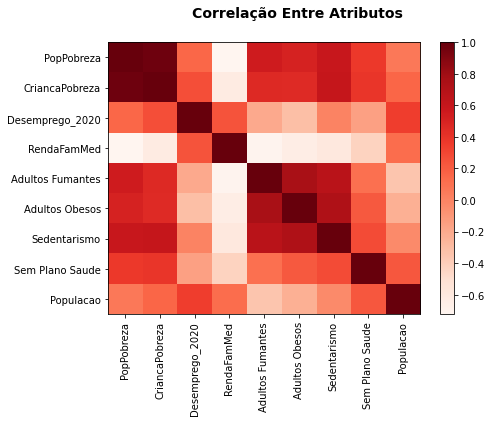

In [14]:
import matplotlib.pyplot as plt
corr = merge_final.corr(min_periods=3)
plt.figure(figsize =(7,5))
plt.imshow(corr, cmap='Reds', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.suptitle('Correlação Entre Atributos', fontsize = 14, fontweight = 'bold')
plt.grid(False)
plt.show()


In [15]:
print(corr['Adultos Fumantes'].tolist())

[0.5456662474551945, 0.4596031072180751, -0.19923560071340216, -0.7080111170041035, 1.0, 0.7541432446930104, 0.6635021786097195, 0.10366943042159422, -0.35142114994249907]


## Explorando os Dados das Eleições

In [16]:
eleicoes_df = pd.read_csv('democratic_vs_republican_votes_by_usa_state_2020.csv')
eleicoes_df.head()


,state,DEM,REP,usa_state,usa_state_code,percent_democrat
0,Alabama,843473,1434159,Alabama,AL,37.032892
1,Alaska,45758,80999,Alaska,AK,36.098993
2,Arizona,1643664,1626679,Arizona,AZ,50.259682
3,Arkansas,420985,761251,Arkansas,AR,35.609218
4,California,9315259,4812735,California,CA,65.934760


In [17]:
for index in eleicoes_df.index:
    eleicoes_df.loc[index, 'percent_republican'] = float(100 - eleicoes_df.loc[index, 'percent_democrat'])
eleicoes_df.head()

,state,DEM,REP,usa_state,usa_state_code,percent_democrat,percent_republican
0,Alabama,843473,1434159,Alabama,AL,37.032892,62.967108
1,Alaska,45758,80999,Alaska,AK,36.098993,63.901007
2,Arizona,1643664,1626679,Arizona,AZ,50.259682,49.740318
3,Arkansas,420985,761251,Arkansas,AR,35.609218,64.390782
4,California,9315259,4812735,California,CA,65.934760,34.065240


### Encontrando os Extremos (Mais Republicanos e Mais Democratas)

In [18]:

mais_republicano = eleicoes_df.iloc[eleicoes_df['percent_republican'].idxmax(), :]
mais_democrata = eleicoes_df.iloc[eleicoes_df['percent_democrat'].idxmax(), :]
print(mais_republicano, mais_democrata)

## Mais Republicano: Wyoming
## Mais Democrata: District of Columbia

state                 Wyoming
DEM                     73445
REP                    193454
usa_state             Wyoming
usa_state_code             WY
percent_democrat      27.5179
percent_republican    72.4821
Name: 50, dtype: object state                 District of Columbia
DEM                                 258561
REP                                  14449
usa_state             District of Columbia
usa_state_code                          DC
percent_democrat                  94.70752
percent_republican                 5.29248
Name: 8, dtype: object


### Entendo a Relação entre os Partidos e os Estados e a Vacinação

In [19]:
vac_analise = vacinacao_df.loc[vacinacao_df['Sigla'].isin(['WY', 'DC'])]
##vac_analise.head()
vac_analise = pd.merge(vac_analise,merge_final[['Sigla','Populacao']],on='Sigla', how='left')
vac_analise.total_vacinados = vac_analise.total_vacinados.astype(int)

array1 = vac_analise['total_vacinados'].tolist()
array2 = vac_analise['Populacao'].tolist()
array3 = []
for i in range(len(array1)):
    array3.append(array1[i]/array2[i])
print(array1[len(array1)-1], array2[len(array1)-1], array3[len(array1)-1])



569168 581075 0.9795086692767715


In [20]:
vac_analise['vac/populacao'] = pd.Series(array3)
vac_analise.head()

,Nome,Sigla,date,total_vacinados,vacinados_dia,diff,Populacao,vac/populacao
0,District of Columbia,DC,2020-12-24,4500,-5397389.0,True,714153,0.006301
1,District of Columbia,DC,2020-12-30,11370,6870.0,False,714153,0.015921
2,District of Columbia,DC,2021-01-02,15072,3702.0,False,714153,0.021105
3,District of Columbia,DC,2021-01-04,16989,1917.0,False,714153,0.023789
4,District of Columbia,DC,2021-01-06,17475,486.0,False,714153,0.024470


<AxesSubplot:xlabel='Data', ylabel='Vacinação/População'>

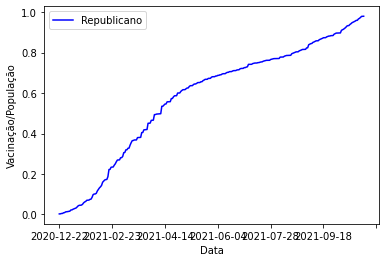

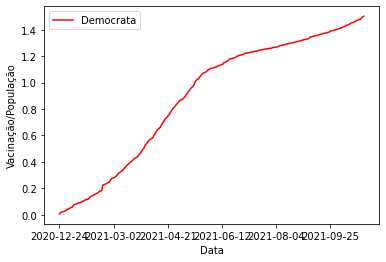

In [26]:
import matplotlib.pyplot as plt

rep_df = vac_analise.loc[vac_analise['Sigla'] == 'WY']
dem_df = vac_analise.loc[vac_analise['Sigla'] == 'DC']

rep_df.plot(x='date', y='vac/populacao', color='blue', label='Republicano', xlabel='Data', ylabel='Vacinação/População')
dem_df.plot(x='date', y='vac/populacao', color='red', label='Democrata',  xlabel='Data', ylabel='Vacinação/População')


### Analisando a Relação entre os Partidos nos Estados com o Número de Casos e Mortes

#### Estado Mais Republicano

In [80]:
casos_rep = casos_df.loc[casos_df['Nome'] == 'Wyoming']
populacao_wy = int(merge_final.Populacao.loc[merge_final.Sigla == 'WY'])
datas = []
for col in casos_rep.columns:
    datas.append(col)
casos = casos_rep.iloc[0,1:].tolist()

casos_pop = []
for caso in casos:
    casos_pop.append(caso/populacao_wy)

casos_rep_analise = pd.DataFrame()
casos_rep_analise['data'] = pd.Series(datas)
casos_rep_analise['casos'] = pd.Series(casos)
casos_rep_analise['casos/populacao'] = pd.Series(casos_pop)
casos_rep_analise['casos'] = casos_rep_analise.casos.shift(1)
casos_rep_analise['casos/populacao'] = casos_rep_analise['casos/populacao'].shift(1)
casos_rep_analise = casos_rep_analise.iloc[1:,:]
casos_rep_analise.head(160)



,data,casos,casos/populacao
1,01-01-2021,44409.0,0.076426
2,01-02-2021,44573.0,0.076708
3,01-03-2021,44875.0,0.077228
4,01-04-2021,45257.0,0.077885
5,01-05-2021,45569.0,0.078422
...,...,...,...
148,05-28-2021,60144.0,0.103505
149,05-29-2021,60144.0,0.103505
150,05-30-2021,60144.0,0.103505
151,05-31-2021,60144.0,0.103505


#### Estado Mais Democrata

In [79]:
casos_dem = casos_df.loc[casos_df['Nome'] == 'District of Columbia']
populacao_dc = int(merge_final.Populacao.loc[merge_final.Sigla == 'DC'])
datas = []
for col in casos_dem.columns:
    datas.append(col)
casos = casos_dem.iloc[0,1:].tolist()

casos_pop = []
for caso in casos:
    casos_pop.append(caso/populacao_dc)

casos_dem_analise = pd.DataFrame()
casos_dem_analise['data'] = pd.Series(datas)
casos_dem_analise['casos'] = pd.Series(casos)
casos_dem_analise['casos/populacao'] = pd.Series(casos_pop)
casos_dem_analise['casos'] = casos_dem_analise.casos.shift(1)
casos_dem_analise['casos/populacao'] = casos_dem_analise['casos/populacao'].shift(1)
casos_dem_analise = casos_dem_analise.iloc[1:,:]
casos_dem_analise.head(160)

,data,casos,casos/populacao
1,01-01-2021,29252.0,0.040960
2,01-02-2021,29509.0,0.041320
3,01-03-2021,29764.0,0.041677
4,01-04-2021,29904.0,0.041873
5,01-05-2021,30166.0,0.042240
...,...,...,...
148,05-28-2021,48898.0,0.068470
149,05-29-2021,48898.0,0.068470
150,05-30-2021,48898.0,0.068470
151,05-31-2021,48898.0,0.068470
